In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
from sklearn.tree import DecisionTreeClassifier      #분류문제해결 결정트리모델
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [5]:
# Titanic 데이터 불러오기
titanic_df = sns.load_dataset("titanic")

# 'y' 컬럼 추가 (생존 여부를 저장)
titanic_df['y'] = titanic_df['survived']

# 데이터 확인
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,y
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [6]:
# Titanic 데이터 불러오기
titanic_df = sns.load_dataset("titanic").copy()

# 사용 가능한 컬럼만 선택
titanic_df = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'embark_town', 'alive']].copy()

# 문자형 데이터를 숫자로 변환 (Label Encoding)(모델 학습을 위해 모든 변수는 숫자형으로 변환)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1}).astype(int)
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(float)
titanic_df['who'] = titanic_df['who'].map({'man': 0, 'woman': 1, 'child': 2}).astype(int)
titanic_df['embark_town'] = titanic_df['embark_town'].map({'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2}).astype(float)
titanic_df['alive'] = titanic_df['alive'].map({'yes': 1, 'no': 0}).astype(int)

# 결측값 처리 후 데이터 타입 변환
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median()).astype(float)
titanic_df['fare'] = titanic_df['fare'].fillna(titanic_df['fare'].median()).astype(float)
titanic_df['embarked'] = titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0]).astype(float)
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0]).astype(float)

# target 값 추가
titanic_df['y'] = sns.load_dataset("titanic")['survived']

# 데이터 타입 확인
print(" 변환 후 데이터 타입:")
print(titanic_df.dtypes)

# 데이터 분할 (특징과 타겟 변수 분리)
X = titanic_df.drop(columns=['y'])
y = titanic_df['y']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모든 데이터 타입을 float으로 변환 (학습과 예측 단계에서 데이터 타입 오류를 방지)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

 변환 후 데이터 타입:
pclass           int64
sex              int32
age            float64
sibsp            int64
parch            int64
fare           float64
embarked       float64
who              int32
embark_town    float64
alive            int32
y                int64
dtype: object


In [7]:
# 디버깅 코드: 문자열 데이터가 남아 있는지 확인
print("\n X 데이터에서 문자열 컬럼 확인:", X.select_dtypes(include=['object']).columns)


 X 데이터에서 문자열 컬럼 확인: Index([], dtype='object')


In [8]:
X = titanic_df.drop(columns=['y'])  # 입력 변수 (X)
y = titanic_df['y']  # 타겟 변수 (y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

In [10]:
len(X_train)

712

In [11]:
len(X_test)

179

In [12]:
len(y_train)

712

In [13]:
len(y_test)

179

In [14]:
dt_clf=DecisionTreeClassifier(random_state=82)

In [15]:
dt_clf

DecisionTreeClassifier(random_state=82)

In [16]:
#데이터는 분류했고
#모델은 만들었고
#우리는 나눈 데이터로 모델을 학습시키면 된다.
#fit(학습데이터 넣기)
dt_clf.fit(X_train, y_train) #train 데이터로 학습

DecisionTreeClassifier(random_state=82)

In [17]:
#예측이 필요하다.
#예측값을 출력하는 방법 predict(데이터)

train_pred = dt_clf.predict(X_train)

In [18]:
train_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [19]:
# test에 대한 예측값
test_pred =dt_clf.predict(X_test)

In [20]:
test_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [21]:
# 평가 진행 
# 잘 맞췄냐!? 머신 맞춘 것
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,train_pred))

1.0


In [22]:
print(accuracy_score(y_test,test_pred))

1.0


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

cv_acc_train=[]   #각 폴드마다 구한 Train Accuracy, Test Accuracy를 저장할 리스트
cv_acc_test=[]
kf_ml = DecisionTreeClassifier(random_state=82)  #매 fold마다 사용할 결정 트리 분류기 객체 생성

In [25]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [26]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=82)

# Feature, Target 분리
X = titanic_df.drop(columns=['y'])  # 예제에서 타겟 컬럼이 'Survived'라고 가정
y = titanic_df['y']

# 정확도 저장 리스트
cv_acc_train = []
cv_acc_test = []

n_iter = 0  #반복 횟수(= iteration count)를 저장할 변수, 0으로 초기화함 → 반복이 시작되기 전에 카운터를 0부터 시작하겠다는 뜻

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # 모델 학습
    kf_ml.fit(X_train, y_train)
    
    # 예측
    kf_pred_train = kf_ml.predict(X_train)
    kf_pred_test = kf_ml.predict(X_test)
    
    # 정확도 계산
    n_iter += 1
    acc_train = np.round(accuracy_score(y_train, kf_pred_train), 4)
    acc_test = np.round(accuracy_score(y_test, kf_pred_test), 4)
    
    print(f'\n {n_iter}번 train 교차 검증 정확도: {acc_train}, test 교차 검증 정확도: {acc_test}')
    
    cv_acc_train.append(acc_train)
    cv_acc_test.append(acc_test)


 1번 train 교차 검증 정확도: 1.0, test 교차 검증 정확도: 1.0

 2번 train 교차 검증 정확도: 1.0, test 교차 검증 정확도: 1.0

 3번 train 교차 검증 정확도: 1.0, test 교차 검증 정확도: 1.0

 4번 train 교차 검증 정확도: 1.0, test 교차 검증 정확도: 1.0

 5번 train 교차 검증 정확도: 1.0, test 교차 검증 정확도: 1.0


In [27]:
print('survived' in X.columns)

False


In [28]:
print(y.value_counts(normalize=True))

y
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [29]:
titanic_df.y.value_counts()

y
0    549
1    342
Name: count, dtype: int64

In [30]:
# KFold 불균형 문제를 해결하기 위해서 사용하는 skf
from sklearn.model_selection import StratifiedKFold

In [31]:
skf_titanic = StratifiedKFold(n_splits=5)
cnt_iter = 0

In [32]:
n_iter = 0

skf_cv_acc_train=[]
skf_cv_acc_test=[]
skf_ml = DecisionTreeClassifier(random_state=82)

#skf 사용한 교차검증 
for train_idx, test_idx in kf.split(X,y): #skf split 안에
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    #skf_dt모델 학습하기
    skf_ml.fit(X_train, y_train)
    
    #예측 (skf, split을 통해 진행)
    skf_pred_train =skf_ml.predict(X_train)
    skf_pred_test =skf_ml.predict(X_test)
    
    # 정확도를 5번 측정할 것
    
    n_iter +=1     # 반복힛수를 1씩 증가, 현재 몇 번째 Fold인지 추적하는 카운터
    acc_train = np.round(accuracy_score(y_train, skf_pred_train),4) #정확도를 소수점 넷째 자리까지 반올림
    acc_test = np.round(accuracy_score(y_test, skf_pred_test),4)
    
    #교차검증 train, test 정확도 확인
    print('\n {} 번 train 교차 검증 정확도 :{}, test의 교차검증 정확도 :{}'.format(n_iter, acc_train, acc_test))

    skf_cv_acc_train.append(acc_train) #리스트에 이번 Fold의 학습 정확도 저장
    skf_cv_acc_test.append(acc_test)  #리스트에 이번 Fold의 테스트 정확도 저장
    

print('train 평균 정확도', np.mean(skf_cv_acc_train))
print('test 평균 정확도', np.mean(skf_cv_acc_test))


 1 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :1.0

 2 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :1.0

 3 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :1.0

 4 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :1.0

 5 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :1.0
train 평균 정확도 1.0
test 평균 정확도 1.0


In [33]:
# KFold 설정 (5개의 폴드)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

n_iter = 0  # 반복 횟수

# KFold 교차 검증 시작
for train_idx, test_idx in kfold.split(X, y):
    n_iter += 1
    lb_train = y.iloc[train_idx]  # 학습 데이터 레이블, 훈련 데이터용 타겟값
    lb_test = y.iloc[test_idx]  # 테스트 데이터 레이블, 테스트 데이터용 타겟값
    
    print(f'\n------ {n_iter}번째 Fold ------')
    print('학습 정답 레이블 분포:\n', lb_train.value_counts())
    print('테스트 정답 레이블 분포:\n', lb_test.value_counts())


------ 1번째 Fold ------
학습 정답 레이블 분포:
 y
0    444
1    268
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    105
1     74
Name: count, dtype: int64

------ 2번째 Fold ------
학습 정답 레이블 분포:
 y
0    438
1    275
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    111
1     67
Name: count, dtype: int64

------ 3번째 Fold ------
학습 정답 레이블 분포:
 y
0    441
1    272
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    108
1     70
Name: count, dtype: int64

------ 4번째 Fold ------
학습 정답 레이블 분포:
 y
0    437
1    276
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    112
1     66
Name: count, dtype: int64

------ 5번째 Fold ------
학습 정답 레이블 분포:
 y
0    436
1    277
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    113
1     65
Name: count, dtype: int64


In [34]:
skfold = StratifiedKFold(n_splits=5)
n_iter = 0
for train_idx, test_idx in skfold.split(X, y):
    n_iter += 1
    lb_train = y.iloc[train_idx]  # 학습 데이터 레이블
    lb_test = y.iloc[test_idx]  # 테스트 데이터 레이블
    
    print(f'\n------ {n_iter}번째 Fold ------')
    print('학습 정답 레이블 분포:\n', lb_train.value_counts())
    print('테스트 정답 레이블 분포:\n', lb_test.value_counts())


------ 1번째 Fold ------
학습 정답 레이블 분포:
 y
0    439
1    273
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    110
1     69
Name: count, dtype: int64

------ 2번째 Fold ------
학습 정답 레이블 분포:
 y
0    439
1    274
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    110
1     68
Name: count, dtype: int64

------ 3번째 Fold ------
학습 정답 레이블 분포:
 y
0    439
1    274
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    110
1     68
Name: count, dtype: int64

------ 4번째 Fold ------
학습 정답 레이블 분포:
 y
0    439
1    274
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    110
1     68
Name: count, dtype: int64

------ 5번째 Fold ------
학습 정답 레이블 분포:
 y
0    440
1    273
Name: count, dtype: int64
테스트 정답 레이블 분포:
 y
0    109
1     69
Name: count, dtype: int64


# 시계열 데이터 split

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [36]:
## 예제 데이터셋 만들기

np.random.seed(42)
n_samples = 100

In [37]:
## 시계열 데이터 생성
dates= pd.date_range(start='2023-01-01', periods = n_samples)

In [44]:
## (추세 + 노이즈 )

data = pd.DataFrame({
    'date':dates,
    'value':np.arange(n_samples) + np.random.randn(n_samples)*5   # 시간이 흐를수록 값이 점점 증가하는 선형적인 패턴 (추세) , 
                                                                #랜덤한 흔들림(노이즈) \
})

In [43]:
tscv=TimeSeriesSplit(n_splits=5) 
#데이터를 시간 순서를 절대 유지하면서, 총 5번 훈련/테스트 세트를 나눌 수 있는 구조. 시간 순서를 지키는 교차 검증
#보통의 KFold는 데이터를 섞어서 무작위로 나눔 근데 시계열에서는 시간 순서가 절대적으로 중요
# (예: 미래 데이터를 과거로 넣으면 안 됨)
#그래서 TimeSeriesSplit은 시간 순서를 보존하면서 앞부분으로 학습하고, 뒷부분을 예측하는 구조

In [40]:
## X, y 설정
X = np.arange(n_samples).reshape(-1,1)   #시간의 흐름을 숫자로 표현한 것, 모델에 넣기 위해 2차원 형태
y = data['value'].values      #우리가 만든 시계열 값 (추세 + 노이즈), .values를 붙이면 Pandas Series → NumPy 배열로 변환, 모델에 넣기 좋음

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# 시드 고정 및 데이터 생성
np.random.seed(42)
n_samples = 100

# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=n_samples)

# (추세 + 노이즈)
data = pd.DataFrame({
    'date': dates,
    'value': np.arange(n_samples) + np.random.randn(n_samples) * 5
})

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=5)

# X, y 설정
X = np.arange(n_samples).reshape(-1, 1)  # X는 단순히 인덱스 값으로 설정
y = data['value'].values  # y는 생성된 시계열 값

# 교차 검증 진행
mse_scores = []  # 각 Fold에서 구한 MSE 값을 저장할 리스트
fold = 1

for train_idx, test_idx in tscv.split(X):  # TimeSeriesSplit을 통해 데이터 분할
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 훈련 데이터와 테스트 데이터의 크기 출력
    print(f"Fold {fold}: Train samples: {len(X_train)}, Test samples: {len(X_test)}")
    
    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    print(f'Fold {fold}: MSE = {mse}')      #Fold 번호와 MSE 출력 후, 다음 Fold로 넘어가기 위해 번호 증가
    fold += 1

# 평균 MSE 출력
mean_mse = np.mean(mse_scores)
print(f"Mean MSE across folds: {mean_mse}")

Fold 1: Train samples: 20, Test samples: 16
Fold 1: MSE = 106.04232691358717
Fold 2: Train samples: 36, Test samples: 16
Fold 2: MSE = 21.293765433933984
Fold 3: Train samples: 52, Test samples: 16
Fold 3: MSE = 28.732717232643935
Fold 4: Train samples: 68, Test samples: 16
Fold 4: MSE = 31.053362234544124
Fold 5: Train samples: 84, Test samples: 16
Fold 5: MSE = 10.163480004238991
Mean MSE across folds: 39.457130363789645


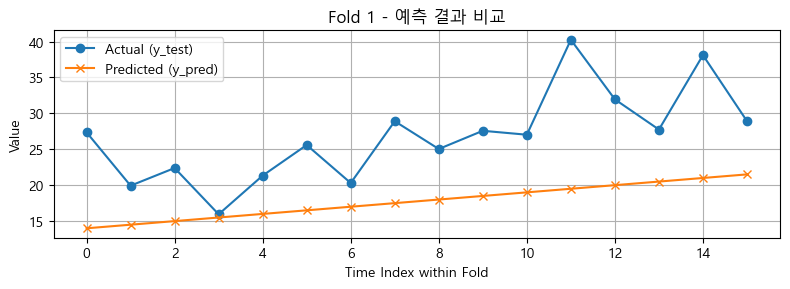

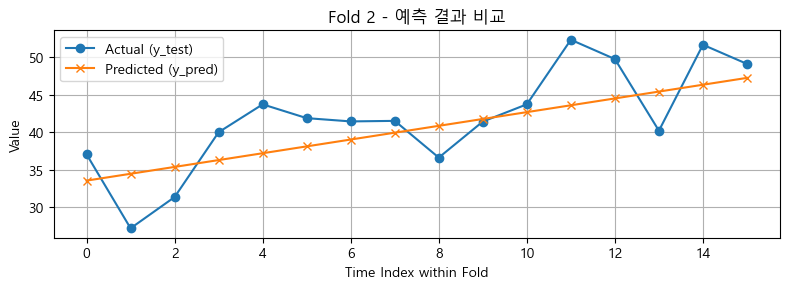

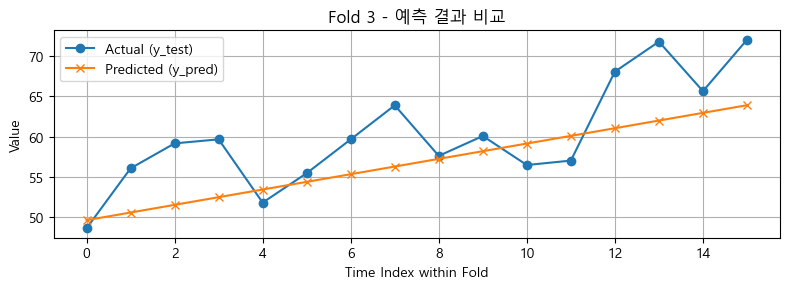

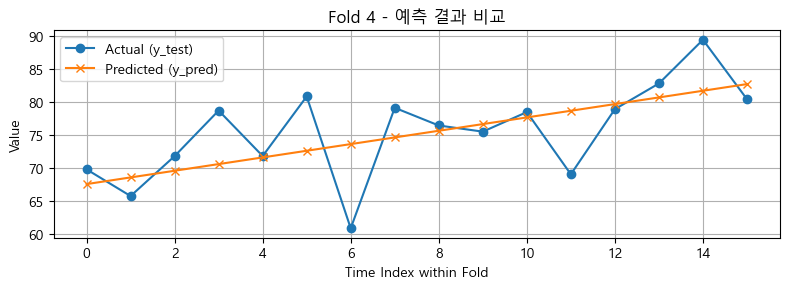

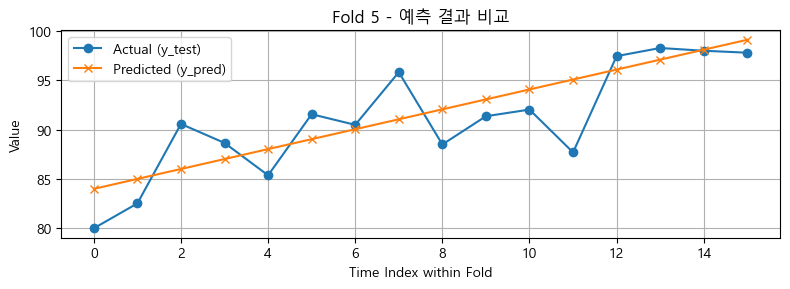

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 예측값 저장용 리스트
all_y_test = []
all_y_pred = []

# Fold 번호 초기화
fold = 1

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 예측 결과 저장
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

    # Fold별 시각화
    plt.figure(figsize=(8, 3))
    plt.plot(y_test, label='Actual (y_test)', marker='o')
    plt.plot(y_pred, label='Predicted (y_pred)', marker='x')
    plt.title(f'Fold {fold} - 예측 결과 비교')
    plt.xlabel('Time Index within Fold')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 깨짐 방지 (− 기호가 깨지지 않도록)
mpl.rcParams['axes.unicode_minus'] = False